# 🧠 **College Event Feedback Analysis – Google Colab**

🚀 **Internship Project – Task 3**

Future Interns – Data Science & Analytics Internship

Created by: KEERTHIKA.P

# 🧾 ***About the Project***

This project analyzes student feedback collected after campus events such as workshops, tech fests, and seminars. Using rating-based survey data, we uncover patterns of satisfaction, identify areas for improvement, and visualize trends for smarter event planning.



# ***🛠 Tools & Skills Used***

▶  Google Colab – Cloud-based notebook

▶  pandas – Data manipulation and cleaning

▶  matplotlib/seaborn – For visualizing satisfaction trends



# ***📊 Analysis Performed***

 ❤   📌 Cleaned & reshaped raw feedback data

 ❤   📈 Created bar plots to show distribution of 1–5 ratings

 ❤   🧮 Calculated average rating per feedback question

❤    📉 Identified best and worst-performing questions

❤    📝 Recommendations for event organizers

# ***📂 Dataset Used***

File: 'Student_Satisfaction_Survey.csv' Exported from a Google Form-based feedback system, with:


 ▶ Multiple feedback questions

▶  Weightage columns (1–5 rating counts)

▶  Course/Department-based grouping


# ***📈 Key Visuals***

📊 Bar chart showing rating spread

📉 Horizontal bar chart of average rating by question

🧾 CSV export of average ratings summary


# ***✅ Insights & Recommendations***


🔹 Most questions received strong 4–5 ratings, indicating general satisfaction.

🔹 Few specific questions had 3.0 or below → need attention by event teams.

🔹 Suggest conducting deeper follow-up for low-rated areas.

# **STEP 1: IMPORTING THE NECESSARY LIBRARY AND LOADING THE DATASET**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
import pandas as pd
df=pd.read_csv('/content/student_feedback.csv')
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


# **STEP 2: UNDERSTAND AND CLEAN THE DATA**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [12]:
df.isnull().sum()

,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [14]:
df.columns

Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [16]:
df.dropna(inplace=True)
df.describe()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [19]:
#rename columns for easier preferences
df.columns=["Index","Student_ID","Subject_Expertise","Concept_Clarity", "Presentations",
    "Assignment_Difficulty", "Doubt_Solving", "Course_Structure",
    "Student_Support", "Course_Recommendation"]
df.drop(columns=["Index"],inplace=True)

In [20]:
df.describe()

,Student_ID,Subject_Expertise,Concept_Clarity,Presentations,Assignment_Difficulty,Doubt_Solving,Course_Structure,Student_Support,Course_Recommendation
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


/tmp/ipython-input-22-4040673922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.mean().reset_index(),x="index",y=0,palette="coolwarm")


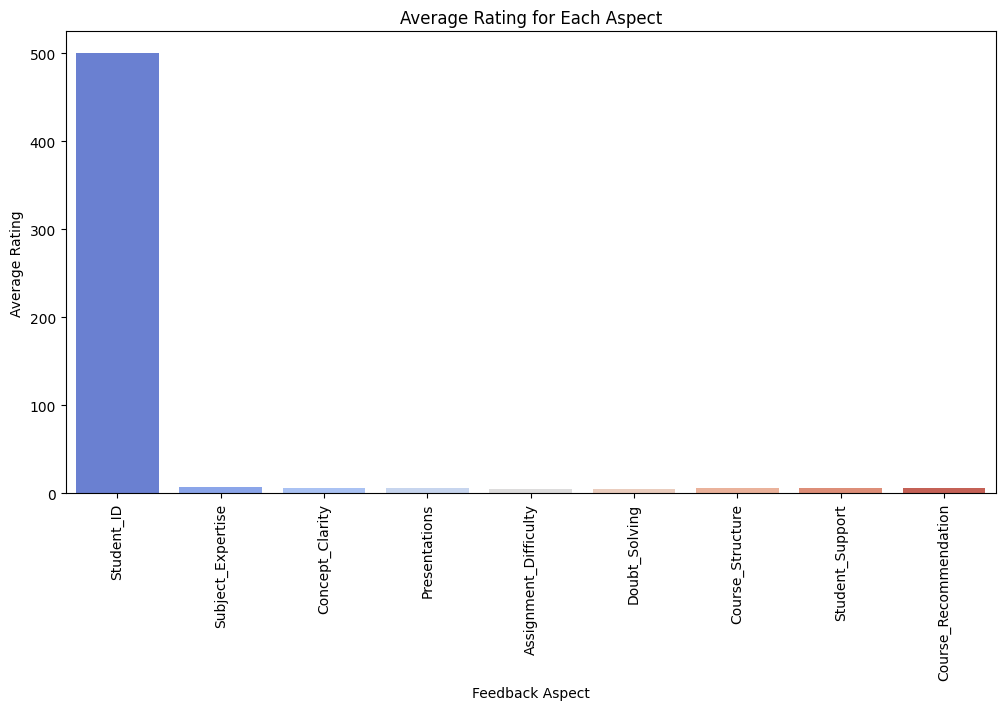

In [22]:
#Average rating for each aspect
plt.figure(figsize=(12,6))
sns.barplot(data=df.mean().reset_index(),x="index",y=0,palette="coolwarm")
plt.xticks(rotation=90)
plt.ylabel("Average Rating")
plt.xlabel("Feedback Aspect")
plt.title("Average Rating for Each Aspect")
plt.show()

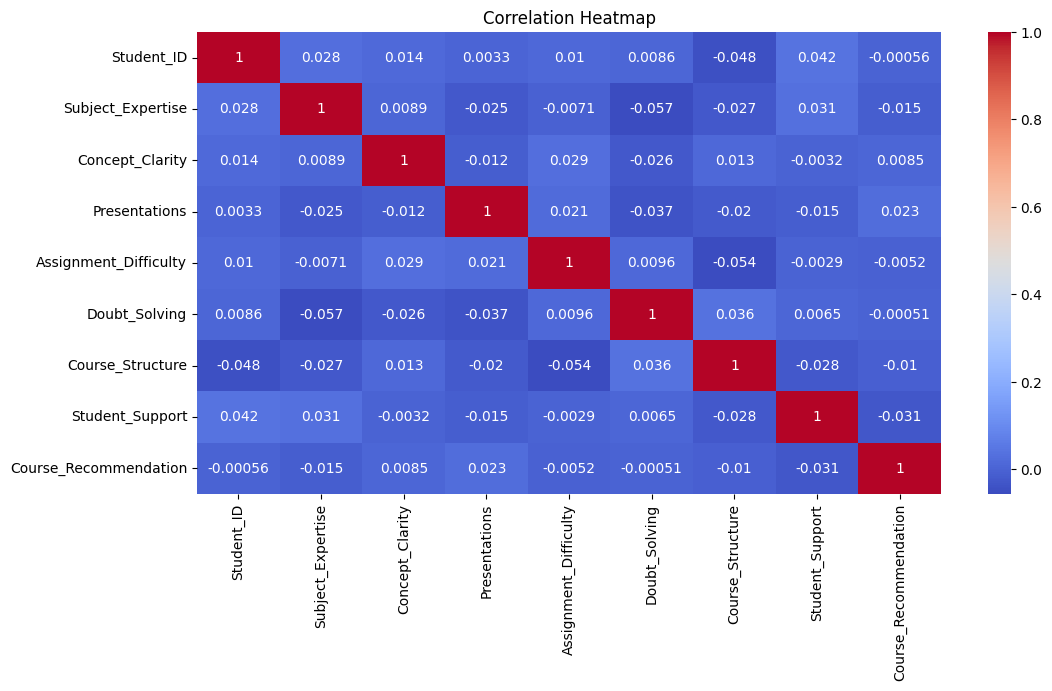

In [24]:
#correlation heatmap between all rating aspects
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
#highest and lowest rated aspects
sorted_avgs=df.mean().sort_values(ascending=False)
sorted_avgs


,0
Student_ID,500.000000
Subject_Expertise,7.497502
Concept_Clarity,6.081918
Presentations,5.942058
Student_Support,5.662338
Course_Structure,5.636364
Course_Recommendation,5.598402
Doubt_Solving,5.474525
Assignment_Difficulty,5.430569


# **📌 Distribution Plots**
Goal: Show how each rating is spread out (not just averages)

Use: Identify skewed ratings (e.g., most students rate 8–10?)



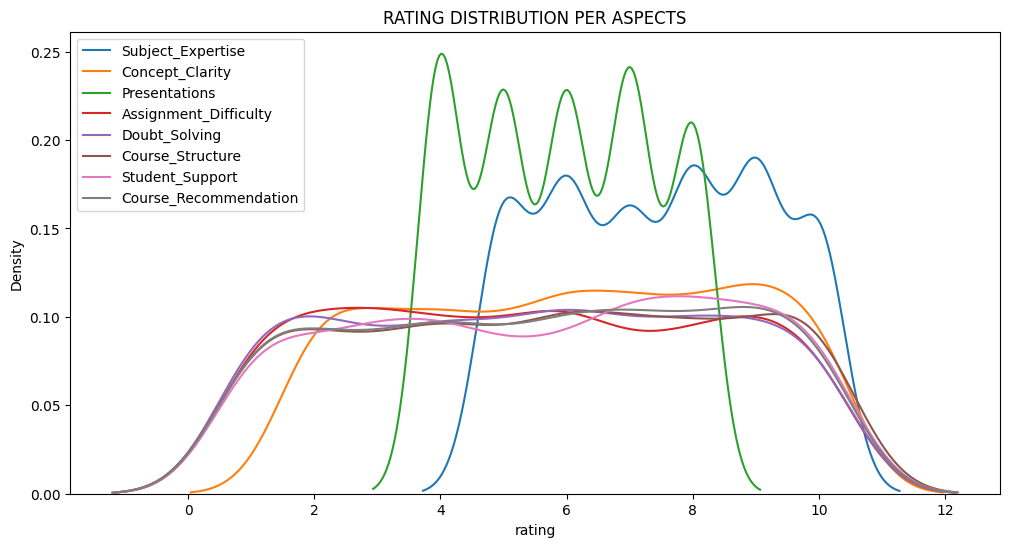

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
for column in df.columns[1:]:
    sns.kdeplot(df[column],label=column)
plt.legend()
plt.title("RATING DISTRIBUTION PER ASPECTS")
plt.xlabel("rating")
plt.show()

# **🧮 Box Plot**
Goal: Show rating spread and detect outliers for each aspect

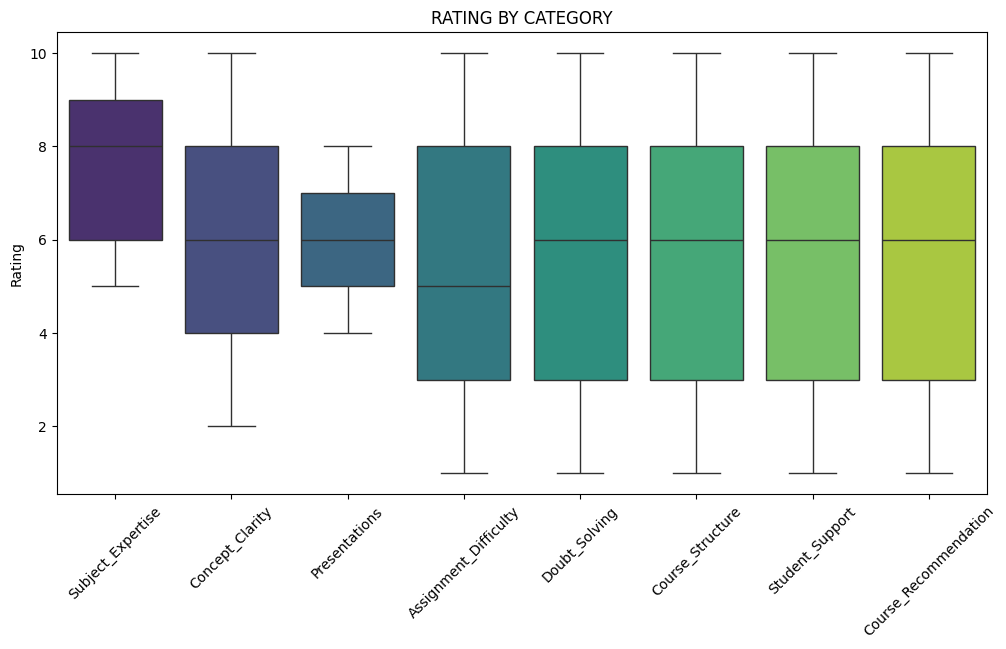

In [31]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df.iloc[:,1:],palette="viridis")
plt.xticks(rotation=45)
plt.title("RATING BY CATEGORY")
plt.ylabel("Rating")
plt.show()

# **🧊 Radar Chart (Spider Chart)**
Goal: Compare multiple rating aspects for a single student or average group

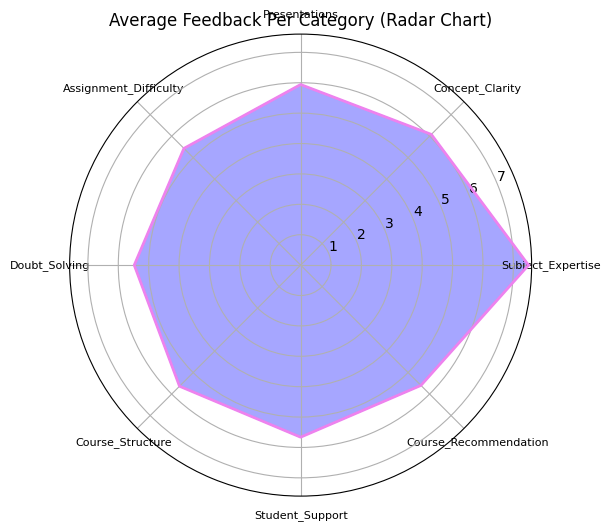

In [43]:
import numpy as np
categories=df.columns[1:]
values=df[categories].mean().tolist()
angles=np.linspace(0,2*np.pi,len(categories),endpoint=False).tolist()
angles += angles[:1]
values += values[:1]
fig,ax=plt.subplots(figsize=(6,6),subplot_kw=dict(polar=True))
ax.plot(angles,values,color='violet',linewidth=2)
ax.fill(angles,values,color='blue',alpha=0.35)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories,fontsize=8)
ax.set_title("Average Feedback Per Category (Radar Chart)")
plt.show()

# **🔁 Pair Plot (Visual Correlation)**
Goal: Show relationships between all rating features

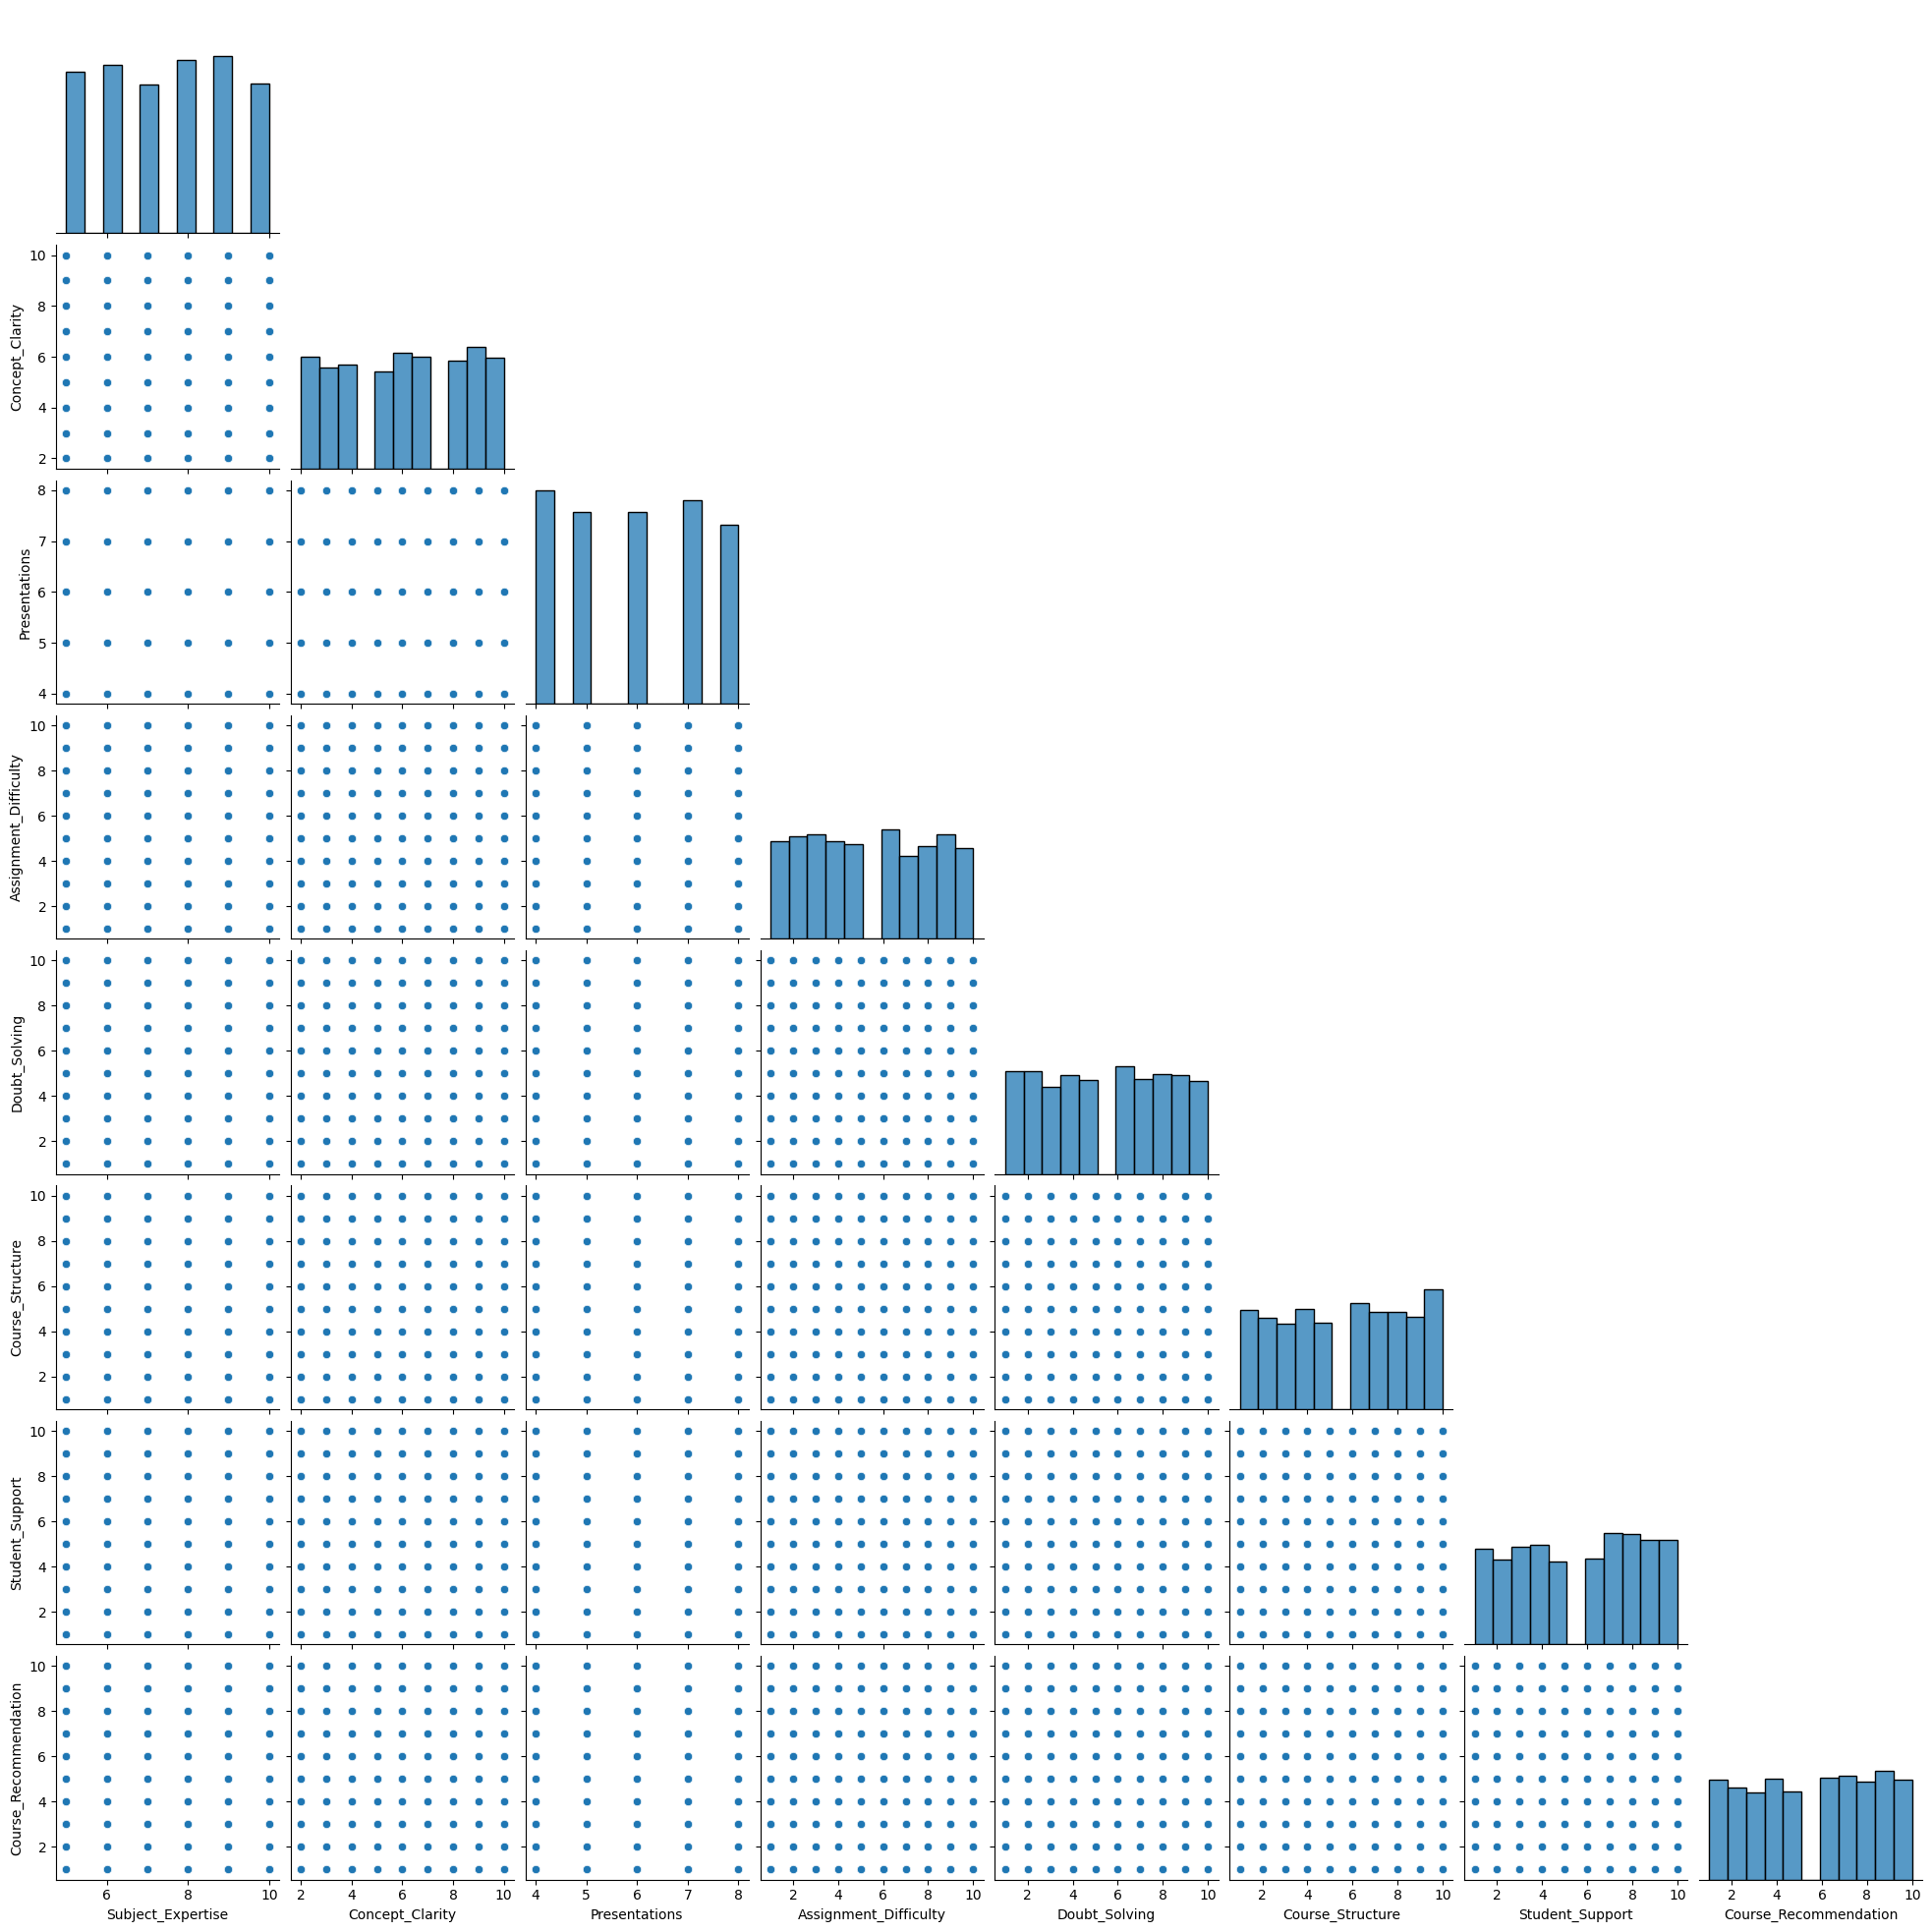

In [44]:
sns.pairplot(df.iloc[:, 1:], corner=True)


# **STEP 3: PERFORM SENTIMENT ANALYSIS**



In [47]:
df.columns

Index(['Student_ID', 'Subject_Expertise', 'Concept_Clarity', 'Presentations',
       'Assignment_Difficulty', 'Doubt_Solving', 'Course_Structure',
       'Student_Support', 'Course_Recommendation'],
      dtype='object')

In [52]:
from textblob import TextBlob
def numeric_sentiment(score):
   if score>=4:
     return 'postive'
   elif score>=2.5:
        return 'neutral'
   else:
     return 'negative'
for col in df.columns[1:]:
  df[col+'-sentiment']=df[col].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
  df[col+'-sentiment']=df[col+'-sentiment'].apply(numeric_sentiment)

In [53]:
sentiment_cols=[col for col in df.columns if col.endswith ("-sentiment")]
df[sentiment_cols].head()

,Subject_Expertise-sentiment,Concept_Clarity-sentiment,Presentations-sentiment,Assignment_Difficulty-sentiment,Doubt_Solving-sentiment,Course_Structure-sentiment,Student_Support-sentiment,Course_Recommendation-sentiment,Subject_Expertise-sentiment-sentiment,Concept_Clarity-sentiment-sentiment,Presentations-sentiment-sentiment,Assignment_Difficulty-sentiment-sentiment,Doubt_Solving-sentiment-sentiment,Course_Structure-sentiment-sentiment,Student_Support-sentiment-sentiment,Course_Recommendation-sentiment-sentiment
0,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
1,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
2,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
3,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
4,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative


In [54]:
for col in sentiment_cols:
  print(f"sentiment distribution for {col}")
  print(df[col].value_counts())
  print("_"*40)

sentiment distribution for Subject_Expertise-sentiment
Subject_Expertise-sentiment
negative    1001
Name: count, dtype: int64
________________________________________
sentiment distribution for Concept_Clarity-sentiment
Concept_Clarity-sentiment
negative    1001
Name: count, dtype: int64
________________________________________
sentiment distribution for Presentations-sentiment
Presentations-sentiment
negative    1001
Name: count, dtype: int64
________________________________________
sentiment distribution for Assignment_Difficulty-sentiment
Assignment_Difficulty-sentiment
negative    1001
Name: count, dtype: int64
________________________________________
sentiment distribution for Doubt_Solving-sentiment
Doubt_Solving-sentiment
negative    1001
Name: count, dtype: int64
________________________________________
sentiment distribution for Course_Structure-sentiment
Course_Structure-sentiment
negative    1001
Name: count, dtype: int64
________________________________________
sentiment di

/tmp/ipython-input-58-2757930020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Subject_Expertise-sentiment',palette="Set2")


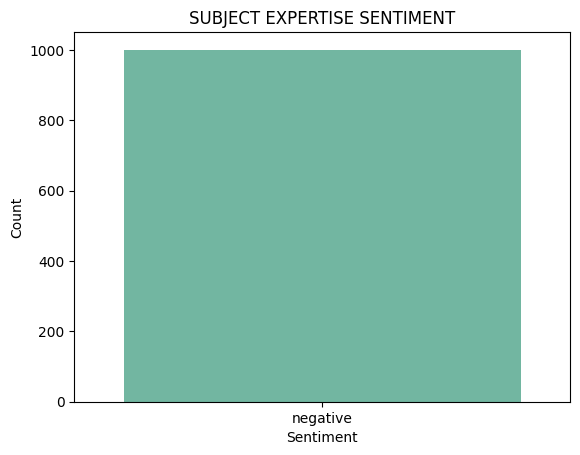

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df,x='Subject_Expertise-sentiment',palette="Set2")
plt.title("SUBJECT EXPERTISE SENTIMENT")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# **STEP 4: GENERATE  SURVEY INSIGHTS**

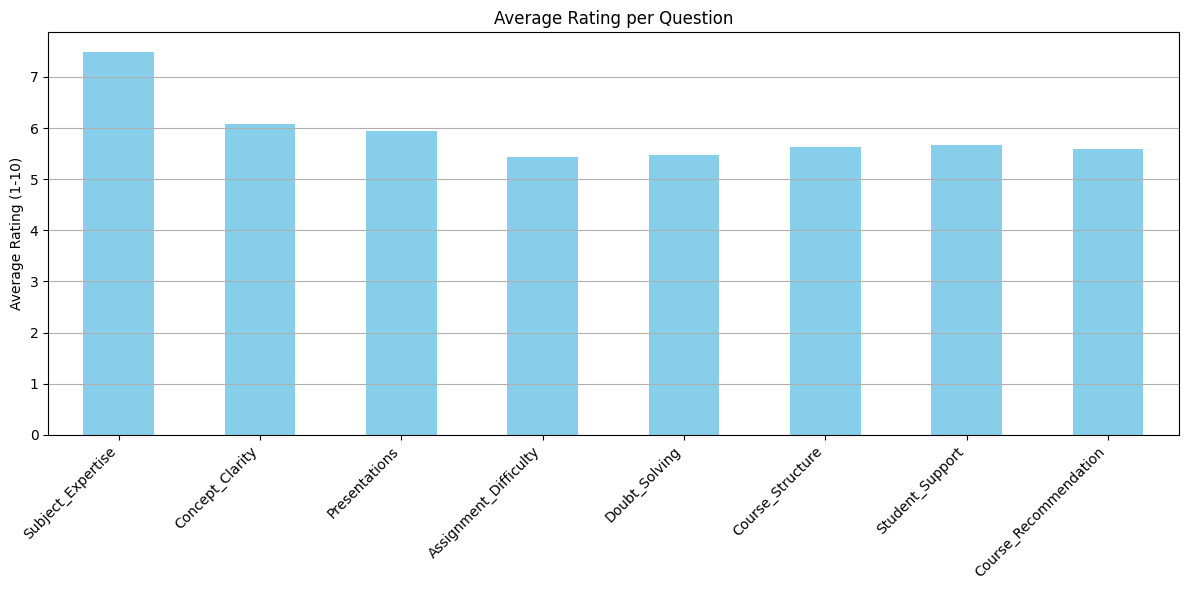

In [69]:
# Select only the numerical rating columns for calculating the mean
numerical_cols = ["Subject_Expertise", "Concept_Clarity", "Presentations",
                  "Assignment_Difficulty", "Doubt_Solving", "Course_Structure",
                  "Student_Support", "Course_Recommendation"]

avg_ratings = df[numerical_cols].mean()

avg_ratings.plot(kind='bar', figsize=(12, 6), color='skyblue', title='Average Rating per Question')
plt.ylabel('Average Rating (1-10)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

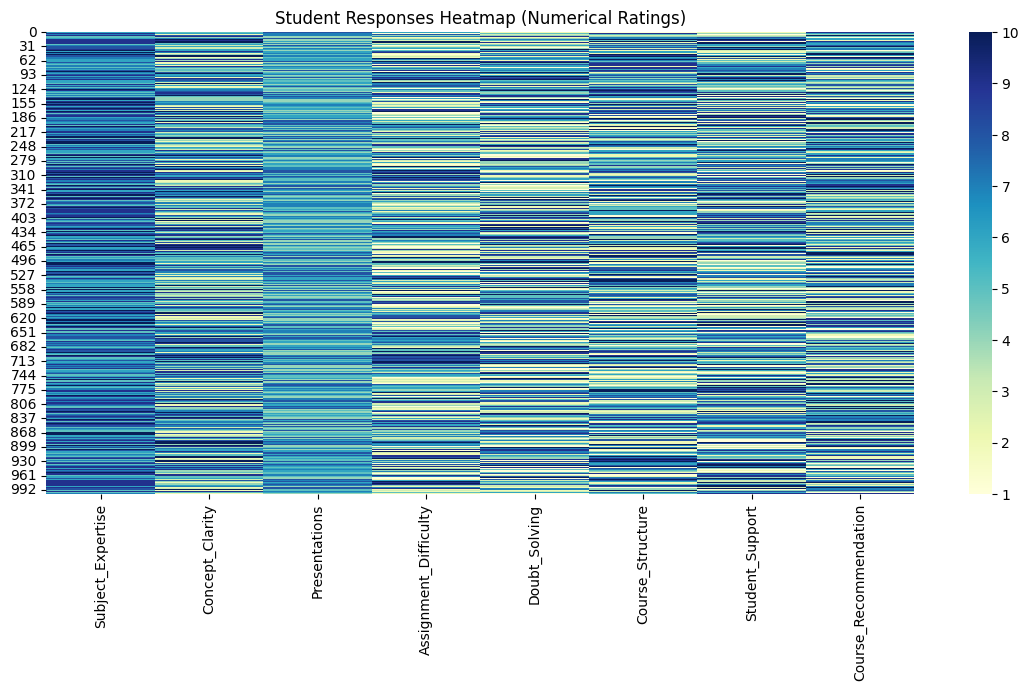

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Select only the numerical rating columns for the heatmap
numerical_cols = ["Subject_Expertise", "Concept_Clarity", "Presentations",
                  "Assignment_Difficulty", "Doubt_Solving", "Course_Structure",
                  "Student_Support", "Course_Recommendation"]

sns.heatmap(df[numerical_cols], cmap='YlGnBu', annot=False, cbar=True)
plt.title("Student Responses Heatmap (Numerical Ratings)")
plt.show()

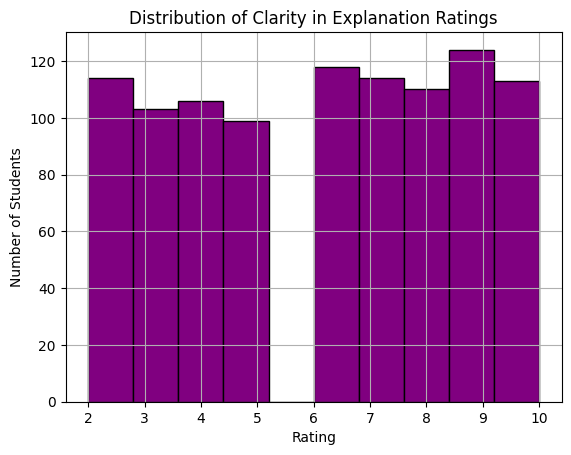

In [74]:
df['Concept_Clarity'].plot(kind='hist', bins=10, color='purple', edgecolor='black')
plt.title("Distribution of Clarity in Explanation Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

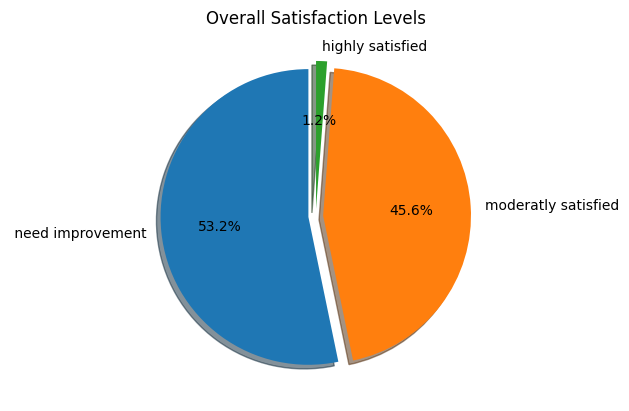

In [80]:
numerical_cols=["Subject_Expertise","Concept_Clarity","Presentations","Assignment_Difficulty","Doubt_Solving","Course_Structure","Student_Support","Course_Recommendation"]
df['Satisfaction_Score']=df[numerical_cols].mean(axis=1)
def classify_satisfaction(score):
  if score>=8:
    return "highly satisfied"
  elif score>=6:
    return "moderatly satisfied"
  else:
    return " need improvement"
df['Satisfaction_Level']=df['Satisfaction_Score'].apply(classify_satisfaction)
df['Satisfaction_Level'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=[0.05]*3,shadow=True)
plt.title("Overall Satisfaction Levels")
plt.ylabel("")
plt.show()